In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Data

In [2]:
dataset = pd.read_csv("Crop_recommendation.csv")

# Data Processing

1. Check datatype to see if conversion needed

In [3]:
dataset.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

2. Drop duplicates based on all columns

In [4]:
dataset.drop_duplicates(inplace=True)

3. Split dataset into training and testing sets

In [5]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

4. Normalize the training and testing feature matrix

In [6]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Model Training

In [7]:
# Train a k-NN classifier with normalized features
#k = 1 # set the number of neighbors
#clf = KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
clf = KNeighborsClassifier()
clf.fit(X_train_norm, y_train)

# Predict the labels for the training and test sets
y_train_pred = clf.predict(X_train_norm)
y_test_pred = clf.predict(X_test_norm)

In [8]:
score = cross_val_score(clf,X,y,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


# Hyperparameters Tuning 

In [9]:
from sklearn import metrics

mean_accuracy = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_accuracy[i-1] = metrics.accuracy_score(y_test, yhat)

mean_accuracy

array([0.98636364, 0.975     , 0.98409091, 0.97954545, 0.98636364,
       0.98181818, 0.98409091, 0.975     , 0.975     , 0.97045455,
       0.97045455, 0.96818182, 0.96818182, 0.96590909, 0.96818182,
       0.96590909, 0.96818182, 0.96818182, 0.96818182, 0.96590909])

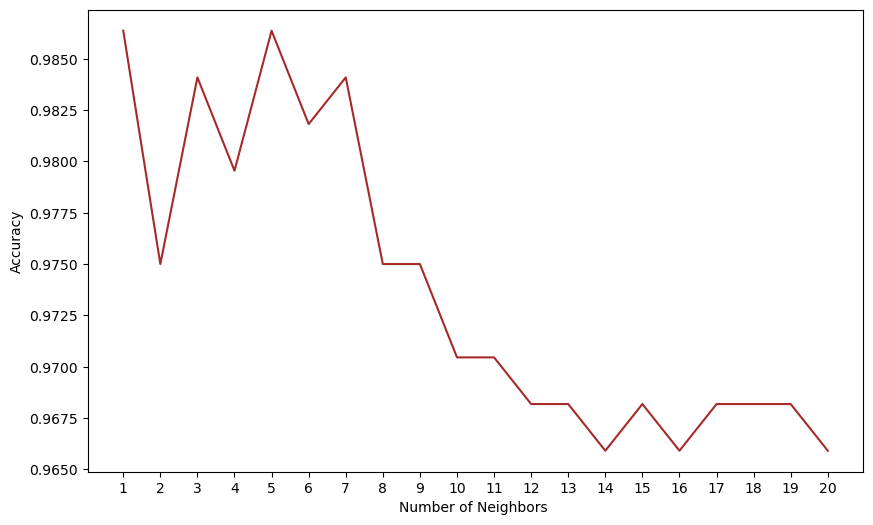

In [10]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_accuracy, color='brown')
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


Best hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best accuracy score:  0.98125


In [12]:
# Using the best hyperparameters
knn_1 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform',metric = 'manhattan')
knn_1.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [13]:
# Training & Testing accuracy after applying hyper parameter
knn_train_accuracy = knn_1.score(X_train,y_train)
print("knn_train_accuracy = ",knn_1.score(X_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn_1.score(X_test,y_test)
print("knn_test_accuracy = ",knn_1.score(X_test,y_test))

knn_train_accuracy =  0.9892045454545455
knn_test_accuracy =  0.990909090909091


# Evaluation

###### Accuracy

In [14]:
# Evaluate the accuracy of the classifier on the training and test sets
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9840909090909091
Testing Accuracy: 0.9863636363636363


##### Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

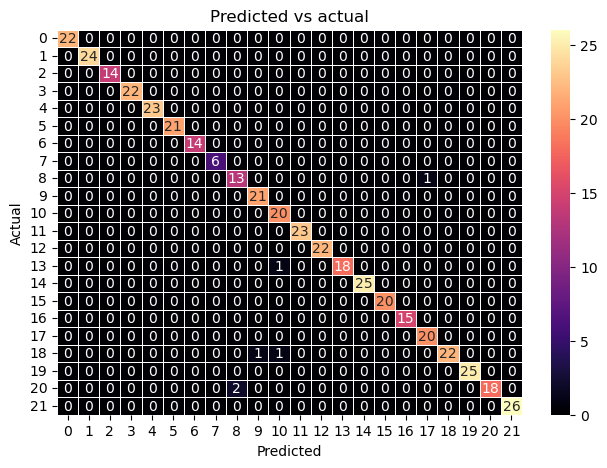

In [16]:
# Confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
f, ax = plt.subplots(figsize=(7.5,5))
sns.heatmap(cm_test, annot=True, linewidth=0.5, fmt=".0f",cmap='magma', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

##### 2. Classification Report

Precision, recall, and F1-Score

In [17]:
# Classification report for test data
cr_test = classification_report(y_test, y_test_pred)
print("Classification Report:\n", cr_test)

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        14
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        14
      grapes       1.00      1.00      1.00         6
        jute       0.87      0.93      0.90        14
 kidneybeans       0.95      1.00      0.98        21
      lentil       0.91      1.00      0.95        20
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        22
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        15
   

# Saving Model for Testing

##### Pickle approach

In [18]:
import pickle

In [19]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn_1, file)

In [20]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_KNN_Model = pickle.load(file)

Pickled_KNN_Model

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [25]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_KNN_Model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_KNN_Model.predict(X_test)  

Ypredict

Test score: 99.09 %


array(['orange', 'muskmelon', 'coconut', 'lentil', 'kidneybeans',
       'mungbean', 'pomegranate', 'mungbean', 'rice', 'papaya', 'jute',
       'coconut', 'orange', 'muskmelon', 'pomegranate', 'apple', 'orange',
       'mango', 'papaya', 'apple', 'muskmelon', 'mango', 'coconut',
       'jute', 'papaya', 'muskmelon', 'muskmelon', 'lentil', 'banana',
       'coffee', 'kidneybeans', 'coconut', 'rice', 'pigeonpeas', 'papaya',
       'pigeonpeas', 'orange', 'blackgram', 'maize', 'kidneybeans',
       'cotton', 'maize', 'papaya', 'lentil', 'blackgram', 'mothbeans',
       'mungbean', 'rice', 'mango', 'pomegranate', 'coffee', 'apple',
       'blackgram', 'lentil', 'chickpea', 'rice', 'jute', 'chickpea',
       'rice', 'blackgram', 'cotton', 'orange', 'coffee', 'mothbeans',
       'banana', 'coconut', 'kidneybeans', 'mothbeans', 'coconut', 'jute',
       'rice', 'pigeonpeas', 'banana', 'rice', 'coconut', 'watermelon',
       'papaya', 'watermelon', 'mango', 'chickpea', 'mungbean', 'mango',
  